In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
import shutil
import random
import os
from pathlib import Path
from glob import glob
from os import walk
import cv2
from collections import Counter
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models
import torchvision.transforms as transforms 

import imgaug as ia
from imgaug import augmenters as iaa

In [22]:
lables  = ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']
lables_dict  = {'i':[], 'ii':[], 'iii':[], 'iv':[], 'ix':[], 'v':[], 'vi':[], 'vii':[], 'viii':[], 'x':[]}
all_files = []

RAW_DATA = 'origin data'
TRAIN_DATA = f'{RAW_DATA}/train'
VAL_DATA = f'{RAW_DATA}/val'

folders = [TRAIN_DATA,VAL_DATA]
for mypath in folders:
    for i, (dirpath, dirnames, filenames) in enumerate(walk(mypath)):
        label = dirpath.split('/')[-1]
        if len(filenames):
            lables_dict[label].extend(filenames)
            all_files.extend(filenames)

In [23]:
len(all_files)

2078

In [24]:
length_dict = {key: len(value) for key, value in lables_dict.items()}
length_dict

{'i': 262,
 'ii': 158,
 'iii': 188,
 'iv': 282,
 'ix': 235,
 'v': 197,
 'vi': 182,
 'vii': 194,
 'viii': 200,
 'x': 180}

<BarContainer object of 10 artists>

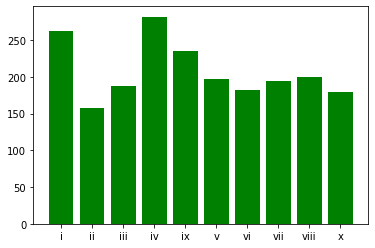

In [25]:
plt.bar(length_dict.keys(), length_dict.values(), color='g')


In [26]:
dims = []
for train_val in folders:
    for label_folder in os.listdir(train_val):
          for image in os.listdir(train_val + '/' + label_folder):
            img_path = os.path.join(train_val, label_folder, image)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            try:
                dims.append(img.shape)
            except:
                continue
            
dimitems = Counter(dims).keys()
print(f"No of unique dims: {len(dimitems)}")
Counter(dims).most_common()[:5]

No of unique dims: 1536


[((253, 259), 9),
 ((253, 264), 9),
 ((232, 232), 8),
 ((264, 280), 8),
 ((253, 286), 8)]

We can see imbalance in the dataset and from checking the labels some look wrong.

check if changing size to 64X64 needs to be adressed

In [37]:

BATCH_SIZE = 1

# Resize the samples and transform them into tensors
data_transforms_64 = transforms.Compose([transforms.Resize([64, 64]), transforms.ToTensor()])
data_transforms_16 = transforms.Compose([transforms.Resize([16, 16]), transforms.ToTensor()])

# Create a pytorch dataset from a directory of images
non_augmented_train = datasets.ImageFolder(TRAIN_DATA, transforms.ToTensor())
train_dataset_64 = datasets.ImageFolder(TRAIN_DATA, data_transforms_64)
train_dataset_16 = datasets.ImageFolder(TRAIN_DATA, data_transforms_16)

class_names = train_dataset.classes
print("The classes are: ", class_names)

# Dataloaders initialization
non_augmented_dataloader = torch.utils.data.DataLoader(non_augmented_train, batch_size=BATCH_SIZE, shuffle=True)
train_dataloader_64 = torch.utils.data.DataLoader(train_dataset_64, batch_size=BATCH_SIZE, shuffle=True)
train_dataloader_16 = torch.utils.data.DataLoader(train_dataset_16, batch_size=BATCH_SIZE, shuffle=True)

The classes are:  ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']


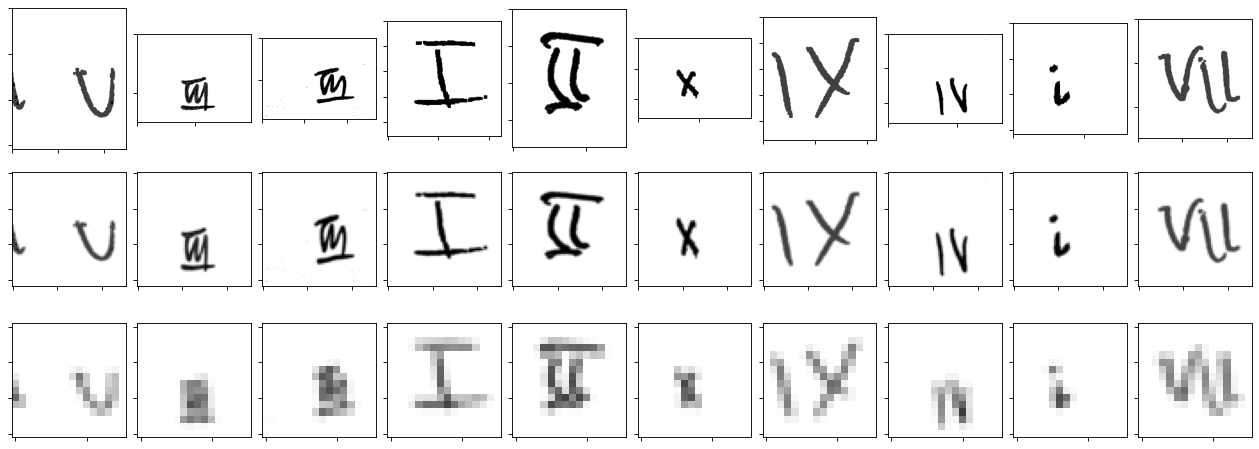

In [38]:
random_index = random.sample(range(len(train_dataloader_64)),10)
imgs_64 = [train_dataset_64[i][0] for i in random_index]
imgs_16 = [train_dataset_16[i][0] for i in random_index]


fig, ax = plt.subplots(nrows=3, ncols=10, figsize=(20, 10), dpi=80)
for i in range(10):   
    tensor = non_augmented_train[random_index[i]][0]
    tensor_train_64 =  train_dataset_64[random_index[i]][0]
    tensor_train_16 =  train_dataset_16[random_index[i]][0]
    # define a transform to convert a tensor to PIL image
    transform = transforms.ToPILImage()

    # convert the tensor to PIL image using above transform
    img = transform(tensor)
    img_train_64 = transform(tensor_train_64)
    img_train_16 = transform(tensor_train_16)

    ax[0][i].imshow(img, cmap='gray')
    ax[1][i].imshow(img_train_64, cmap='gray')
    ax[2][i].imshow(img_train_16, cmap='gray')

[axi.set_yticklabels([]) for axi in ax.ravel()]
[axi.set_xticklabels([]) for axi in ax.ravel()]

plt.subplots_adjust(wspace=0.1, hspace=-0.5)


plt.show()

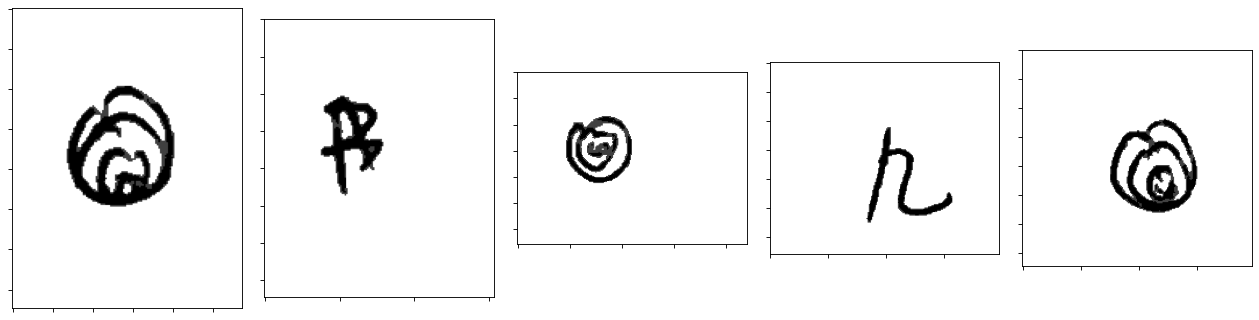

In [47]:
bad_images_list = [
"origin data/train/ix/ae906772-ce5d-11eb-b317-38f9d35ea60f.png",
"origin data/train/ix/aea51e88-ce5d-11eb-b317-38f9d35ea60f.png",
"origin data/train/ix/aeba70da-ce5d-11eb-b317-38f9d35ea60f.png",
"origin data/train/ix/aec595aa-ce5d-11eb-b317-38f9d35ea60f.png",
"origin data/train/ix/aed0b9b2-ce5d-11eb-b317-38f9d35ea60f.png"]

import matplotlib.image as mpimg

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 10), dpi=80)
for i, img in enumerate(bad_images_list):
    img = mpimg.imread(img)
    ax[i].imshow(img, cmap='gray')

[axi.set_yticklabels([]) for axi in ax.ravel()]
[axi.set_xticklabels([]) for axi in ax.ravel()]

plt.subplots_adjust(wspace=0.1, hspace=-0.5)


plt.show()